Problem 1 

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [257]:
dfs=pd.read_csv("Survey-1 (2) (1) (1).csv")

In [258]:
dfs.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [259]:
dfs.shape

(62, 14)

In [260]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [261]:
dfs.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [262]:
dfs.describe(include="all")

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.00,62,62.00,62,62,62,62.00,62,62.00,62.00,62.00,62.00,62,62.00
unique,nan,2,nan,3,8,3,nan,3,nan,nan,nan,nan,3,nan
top,nan,Female,nan,Senior,Retailing/Marketing,Yes,nan,Part-Time,nan,nan,nan,nan,Laptop,nan
freq,nan,33,nan,31,14,28,nan,43,nan,nan,nan,nan,55,nan
mean,31.50,NaN,21.13,NaN,NaN,NaN,3.13,NaN,48.55,1.52,3.74,482.02,NaN,246.21
std,18.04,NaN,1.43,NaN,NaN,NaN,0.38,NaN,12.08,0.84,1.21,221.95,NaN,214.47
min,1.00,NaN,18.00,NaN,NaN,NaN,2.30,NaN,25.00,0.00,1.00,100.00,NaN,0.00
25%,16.25,NaN,20.00,NaN,NaN,NaN,2.90,NaN,40.00,1.00,3.00,312.50,NaN,100.00
50%,31.50,NaN,21.00,NaN,NaN,NaN,3.15,NaN,50.00,1.00,4.00,500.00,NaN,200.00
75%,46.75,NaN,22.00,NaN,NaN,NaN,3.40,NaN,55.00,2.00,4.00,600.00,NaN,300.00


In [263]:
dfs.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.00,NaN,NaN,NaN,31.50,18.04,1.00,16.25,31.50,46.75,62.00
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.00,NaN,NaN,NaN,21.13,1.43,18.00,20.00,21.00,22.00,26.00
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.00,NaN,NaN,NaN,3.13,0.38,2.30,2.90,3.15,3.40,3.90
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.00,NaN,NaN,NaN,48.55,12.08,25.00,40.00,50.00,55.00,80.00
Social Networking,62.00,NaN,NaN,NaN,1.52,0.84,0.00,1.00,1.00,2.00,4.00


1.1. For this data, construct the following contingency tables (Keep Gender as row variable)

1.1.1. Gender and Major

In [264]:
pd.crosstab(dfs["Gender"], dfs["Major"], margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


1.1.2. Gender and Grad Intention

In [265]:
pd.crosstab(dfs["Gender"], dfs["Grad Intention"], margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


1.1.3. Gender and Employment

In [266]:
pd.crosstab(dfs["Gender"], dfs["Employment"], margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


1.1.4. Gender and Computer

In [267]:
pd.crosstab(dfs["Gender"], dfs["Computer"], margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


1.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [268]:
No_male=(dfs.Gender=="Male").sum()
print("The Total number of males are %d" %No_male)

The Total number of males are 29


In [269]:
No_female=(dfs.Gender=="Female").sum()
print("The Total number of females are %d" %No_female)

The Total number of females are 33


In [270]:
Total_mf=dfs.Gender.value_counts().sum()
print("The Total value of male and female are %d" %Total_mf)

The Total value of male and female are 62


1.2.1. What is the probability that a randomly selected CMSU student will be male?

In [271]:
p_male=No_male/Total_mf
print("The probability that a randomly selected CMSU student will be male is %3.3f" %(p_male*100))

The probability that a randomly selected CMSU student will be male is 46.774


1.2.2. What is the probability that a randomly selected CMSU student will be female?

In [272]:
p_female=No_female/Total_mf
print("The probability that a randomly selected CMSU student will be female is %3.3f" %(p_female*100))

The probability that a randomly selected CMSU student will be female is 53.226


1.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

1.3.1. Find the conditional probability of different majors among the male students in CMSU.

1.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [273]:
pd.crosstab(dfs.Gender, dfs['Major'],margins = True,normalize='index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.09,0.09,0.21,0.12,0.12,0.09,0.27,0.00
Male,0.14,0.03,0.14,0.07,0.21,0.14,0.17,0.10
All,0.11,0.06,0.18,0.10,0.16,0.11,0.23,0.05


1.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

1.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [274]:
dfs.groupby(["Gender","Grad Intention"]).size()

Gender  Grad Intention
Female  No                 9
        Undecided         13
        Yes               11
Male    No                 3
        Undecided          9
        Yes               17
dtype: int64

In [275]:
pd.crosstab(dfs.Gender, dfs['Grad Intention'], margins=True, normalize='index')

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.27,0.39,0.33
Male,0.10,0.31,0.59
All,0.19,0.35,0.45


1.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [276]:
dfs.groupby(['Gender','Computer']).size()

Gender  Computer
Female  Desktop      2
        Laptop      29
        Tablet       2
Male    Desktop      3
        Laptop      26
dtype: int64

In [277]:
pd.crosstab(dfs.Gender, dfs.Computer, margins=True, normalize='index')

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.06,0.88,0.06
Male,0.10,0.90,0.00
All,0.08,0.89,0.03


1.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

1.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [278]:
dfs.groupby(["Gender","Employment"]).size() 

Gender  Employment
Female  Full-Time      3
        Part-Time     24
        Unemployed     6
Male    Full-Time      7
        Part-Time     19
        Unemployed     3
dtype: int64

In [279]:
no_full_time= (dfs.Employment== 'Full-Time').sum()
print(no_full_time)
no_male_fulltime=((dfs['Employment'] =='Full-Time') & (dfs['Gender'] =='Male')).sum()
print(no_male_fulltime) 

10
7


In [280]:
p_male_student=round((p_male),4)*100
print("The probability of male student is %3.2f" %p_male_student,"%")
p_fulltime= round((no_full_time/Total_mf),4)*100
print("The probability of fulltime student is %3.2f" %p_fulltime,"%")
p_male_fulltime= round((no_male_fulltime/Total_mf),4)*100
print("The probability of male fulltime student is %3.2f" %p_male_fulltime,"%")

The probability of male student is 46.77 %
The probability of fulltime student is 16.13 %
The probability of male fulltime student is 11.29 %


In [281]:
p_male_or_fulltime= p_male_student+p_fulltime-p_male_fulltime
print(' The probability that a randomly chosen student is a male or has full-time employment is',round((p_male_or_fulltime),4),"%")

 The probability that a randomly chosen student is a male or has full-time employment is 51.61 %


1.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [282]:
dfs.groupby(["Gender","Major"]).size()

Gender  Major                 
Female  Accounting                3
        CIS                       3
        Economics/Finance         7
        International Business    4
        Management                4
        Other                     3
        Retailing/Marketing       9
Male    Accounting                4
        CIS                       1
        Economics/Finance         4
        International Business    2
        Management                6
        Other                     4
        Retailing/Marketing       5
        Undecided                 3
dtype: int64

In [283]:
(dfs['Major'].value_counts())
(dfs.groupby(['Gender', 'Major']).size())
Tot_female = (dfs['Gender']=='Female').sum()
p_female_intbus = ((dfs['Gender']=='Female') & (dfs['Major'] == 'International Business')).sum()
p_manag = ((dfs['Gender']=='Female') & (dfs['Major'] == 'Management')).sum()
p_int_or_man = p_female_intbus + p_manag
p_int_or_man

print('Probability that given a female student is randomly chosen, she is majoring in international business or management is',
      round((p_int_or_man/Tot_female)*100, 2), "%")

Probability that given a female student is randomly chosen, she is majoring in international business or management is 24.24 %


1.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not 
considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [284]:
dfs[dfs['Grad Intention'] == 'Undecided'].index
dfs_cont = dfs.drop(dfs[dfs['Grad Intention'] == 'Undecided'].index)
pd.crosstab(dfs['Gender'] , dfs_cont['Grad Intention'] ,margins =True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [285]:
print('The probability that a randomly selected Student is Female',(20/40)*100,"%")

The probability that a randomly selected Student is Female 50.0 %


In [286]:
val2 = ((dfs['Gender']=='Female') & (dfs_cont['Grad Intention'] == 'Yes')).sum()
print('The probability that a randomly selected student is female and intends to graduate',round((val2/20)*100,4), '%' )
print('They are not independent events')

The probability that a randomly selected student is female and intends to graduate 55.0 %
They are not independent events


1.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

1.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [287]:
no_of_stud_less = (dfs['GPA'] < 3).sum()
print("No of students less than 3GPA is %d" %no_of_stud_less)
print("Total number of students is %d" %Total_mf)

No of students less than 3GPA is 17
Total number of students is 62


In [288]:
p_of_stud_less =no_of_stud_less/Total_mf
print("The probability that a student's GPA is less than 3 is %3.3f" %((p_of_stud_less)*100), '%')

The probability that a student's GPA is less than 3 is 27.419 %


1.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [289]:
pd.crosstab((dfs['Gender']=='Male'), (dfs['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.45,0.55
True,0.52,0.48


In [290]:
pd.crosstab((dfs['Gender']=='Female'), (dfs['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.52,0.48
True,0.45,0.55


1.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them, comment whether they follow a normal distribution. Write a note summarizing your conclusions.

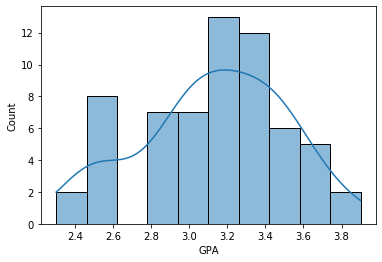

In [291]:
sns.histplot(dfs.GPA, kde=True, bins=10)

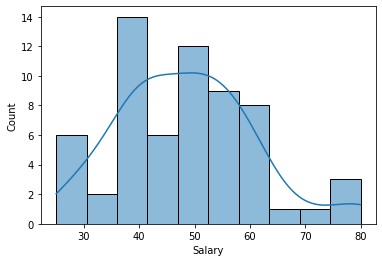

In [292]:
sns.histplot(dfs.Salary, kde=True, bins=10)

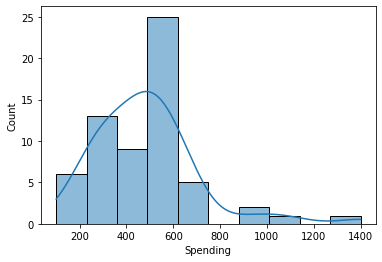

In [293]:
sns.histplot(dfs.Spending, kde=True, bins=10)

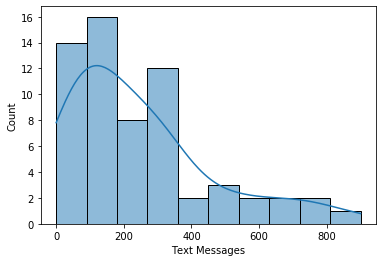

In [294]:
sns.histplot(dfs["Text Messages"], kde=True, bins=10)

skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946
skew value of Spending is 1.5859147414045331
skew value of Text Message is 1.2958079731054333


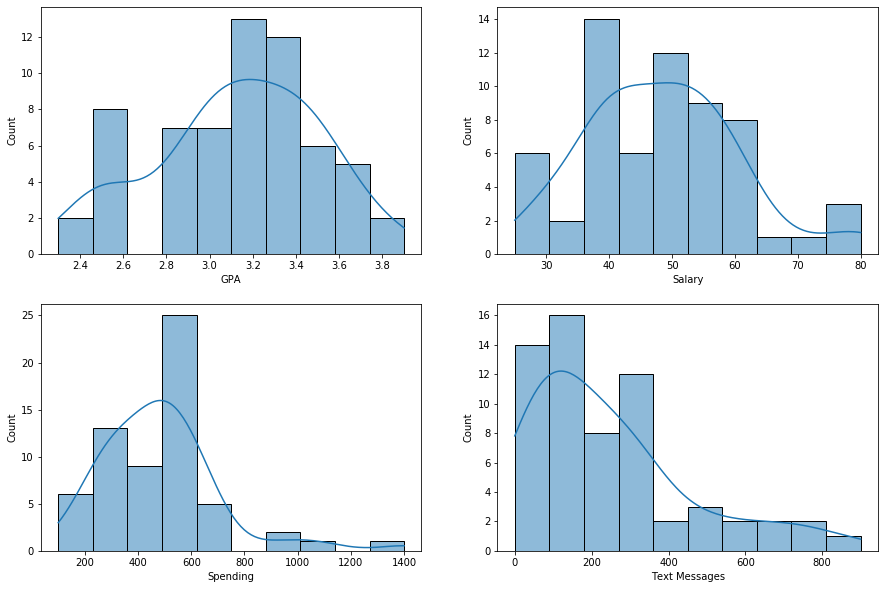

In [295]:
plt.figure(figsize=[15, 10])

plt.subplot(2, 2, 1)
sns.histplot(dfs['GPA'], bins = 10, kde=True);
print('skew value of GPA is', dfs['GPA'].skew())

plt.subplot(2, 2, 2)
sns.histplot(dfs['Salary'], bins = 10, kde=True);
print('skew value of Salary is', dfs['Salary'].skew())


plt.subplot(2, 2, 3)
sns.histplot(dfs['Spending'], bins = 10, kde=True);
print('skew value of Spending is', dfs['Spending'].skew())


plt.subplot(2, 2, 4)
sns.histplot(dfs['Text Messages'], bins = 10, kde=True);
print('skew value of Text Message is', dfs['Text Messages'].skew())

plt.show()

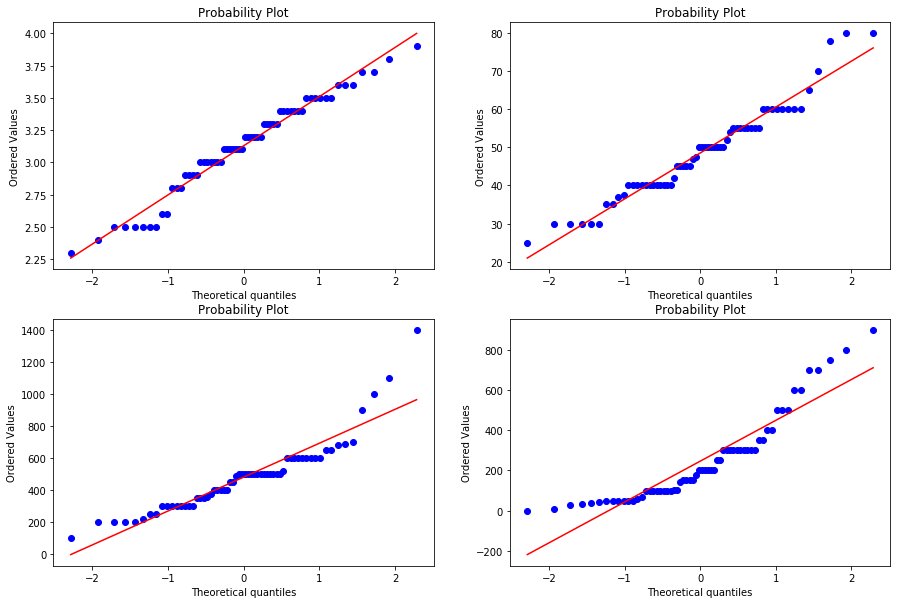

In [296]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
stats.probplot(dfs['GPA'], plot=plt);

plt.subplot(2, 2, 2)
stats.probplot(dfs['Salary'], plot=plt);

plt.subplot(2, 2, 3)
stats.probplot(dfs['Spending'], plot=plt);

plt.subplot(2, 2, 4)
stats.probplot(dfs['Text Messages'], plot=plt);

plt.show()

Problem 2 

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles

2.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from   scipy.stats import ttest_1samp, ttest_ind
import statsmodels.stats.api as sm

In [298]:
df=pd.read_csv("A+&+B+shingles (2).csv")

In [299]:
df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [300]:
df.shape

(36, 2)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [302]:
df.isnull().sum()

A    0
B    5
dtype: int64

In [303]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.00,0.32,0.14,0.13,0.21,0.29,0.39,0.72
B,31.00,0.27,0.14,0.10,0.16,0.23,0.40,0.58


2.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Answer: The following steps will be followed for both sample A and Sample B individually:

Step 1: Defining Null and Alternate Hypothesis for Sample A and Sample B

The null hypothesis states that the moisture content of Sample A  and Sample B is greater or than equal to the permissible limit, 𝜇 ≥ 0.35

The alternative hypothesis states that the moisture content of sample A and Aample B is less than permissible limit, 𝜇 < 0.35

𝐻0 : 𝜇 ≥ 0.35

𝐻𝐴 : 𝜇 < 0.35

Step 2: Significance Level.
We will take the significance level 𝛼 = 0.05 as the alpha value is not given in the question.

Step 3: Identify the test statistic
We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for Sample A and Sample B. One tail test for Sample A and Sample B.



Step 4: Calculate the p - value and test statistic

In [304]:
test_statA, p_valueA = ttest_1samp(df['A'],0.35, nan_policy='omit')
print('test_statistc of Sample A',test_statA)    
print('P Value of Sample A',p_valueA/2)

test_statistc of Sample A -1.4735046253382782
P Value of Sample A 0.07477633144907513


In [305]:
test_statB, p_valueB = ttest_1samp(df['B'],0.35, nan_policy='omit')
print('test statistic of Sample B',test_statB)    
print('P Value of Sample B',p_valueB/2)

test statistic of Sample B -3.1003313069986995
P Value of Sample B 0.0020904774003191826


Step 5: Decide to reject or accept null hypothesis

In [306]:
print ("one-sample t-test p-value=", p_valueA/2)

alpha_level = 0.05

if (p_valueA/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is less than permissible limit in sample A.')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is greater than permissible limit in sample A.')

one-sample t-test p-value= 0.07477633144907513
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is greater than permissible limit in sample A.


In [307]:
print ("one-sample t-test p-value=", p_valueB/2)

alpha_level = 0.05

if (p_valueB/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is less than permissible limit in sample B.')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is greater than permissible limit in sample B.')

one-sample t-test p-value= 0.0020904774003191826
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is less than permissible limit in sample B.


2.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Answer:The following steps are followed:
        
Step 1: Define Null and Alternate Hypothesis.
The Null hypothesis states that the mean of shingle A to mean of shingle B are the same.
The Alternate hypothesis states that the mean are different. Mean of Sample A in not equal to mean od sample B

Step 2:Decide the significance level.
Here we select alpha= 0.05 as the population standard deviation is not known.

Step 3: Identify the test statistic
We have two samples and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for two sample test.


Step 4: Calculate the p - value and test statistic

In [308]:
test_stat, p_value  = ttest_ind(df['A'],df['B'],nan_policy='omit')
print('test_stat',test_stat)    
print('P Value',p_value)

test_stat 1.2896282719661123
P Value 0.2017496571835306


Step 5: Decide to reject or accept null hypothesis


In [309]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to accept the null hypothesis')
    print('We conclude that mean for shingles A and singles B are the same')

else:
    print('We do not have enough evidence to accept the null hypothesis')
    print('We conclude that mean for shingles A and singles B are not the same')

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to accept the null hypothesis
We conclude that mean for shingles A and singles B are not the same


Problem 3

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor's, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]


In [310]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [311]:
df_sd=pd.read_csv("SalaryData (3) (1) (1).csv")

In [312]:
df_sd.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [313]:
df_sd.shape

(40, 3)

In [314]:
df_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [315]:
df_sd.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [316]:
df_sd.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40.00,NaN,NaN,NaN,162186.88,64860.41,50103.00,99897.50,169100.00,214440.75,260151.00


In [317]:
df_sd.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [318]:
df_sd.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

3.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Answer:

Null hypothesis: The salary is dependent on Education Qualification and Occupation.

Alternate hypothesis: The salary is not dependent on Education Qualification and Occupation

In [319]:
n=df_sd.shape[0]*df_sd.shape[1]
k=df_sd.shape[1]

In [320]:
df_bg=k-1
print('Degree of Freedom between groups',df_bg)
df_wg=n-k
print('Degree of Freedom within groups',df_wg)

Degree of Freedom between groups 2
Degree of Freedom within groups 117


3.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [321]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm 

In [322]:
formula = 'Salary~Education'
model = ols(formula, df_sd).fit()
anova_table = anova_lm(model)
print(anova_table)

             df          sum_sq        mean_sq     F  PR(>F)
Education  2.00 102695466735.89 51347733367.94 30.96    0.00
Residual  37.00  61372559274.49  1658717818.23   nan     nan


Since the value of p is less than the significance level, we can reject the null hypothesis and state thet salary does not depend on the educational qualification of the person.

3.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [323]:
formula = 'Salary~Occupation'
model = ols(formula, df_sd).fit()
anova_table = anova_lm(model)
print(anova_table)

              df          sum_sq       mean_sq    F  PR(>F)
Occupation  3.00  11258782926.47 3752927642.16 0.88    0.46
Residual   36.00 152809243083.91 4244701196.78  nan     nan


Since the value of p is greater than the significance level, therefore, we can accept the null hypothesis and state that salary is dependet on the occupation of the person.

3.5 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

Answer:

Null hypothesis: The salary is dependent on Education Qualification and Occupation.

Alternate hypothesis: The salary is not dependent on Education Qualification and Occupation

In [324]:
formula = 'Salary~C(Education)*C(Occupation)'
model = ols(formula, df_sd).fit()
anova_table = anova_lm(model)
(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.00,102695466735.89,51347733367.94,72.21,0.00
C(Occupation),3.00,5519946053.36,1839982017.79,2.59,0.07
C(Education):C(Occupation),6.00,36349090964.89,6058181827.48,8.52,0.00
Residual,29.00,20621020503.03,711069672.52,nan,nan


Since the value of p is less than the significance level, we can reject the null hypothesis and state thet salary does not depend on both educational qualification and the occupation together.

3.6 Explain the business implications of performing ANOVA for this particular case study.

Answer:

By performing the ANOVA test for Salary case study we can say that Salary is not depended on educational qualification but infact it is little dependent on Occupation.

But when considered both the class it says that Salary is moderately depended both with respect to Education and Occupation